In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from FRCfuncs import *
from scipy.optimize import curve_fit

## FRC power Series

In [12]:
FRCAnalysis?

Signature:
FRCAnalysis(
    imA,
    imB,
    pixelSize,
    theta=0,
    meanFilterwidth=3,
    title='someTitle',
    correctDrift=True,
)
Docstring: <no docstring>
File:      c:\users\voort\vandervoortn_mirror\frc\code\frcfuncs.py
Type:      function


applied drift correction of 0.239807 nm in x and and 6.795358 nm in y.



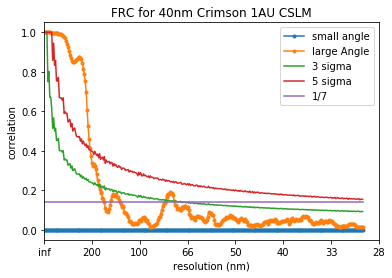

retrieved resolution for 40nm Crimson 1AU CSLM is: 159nm

applied drift correction of -0.711050 nm in x and and 6.260386 nm in y.



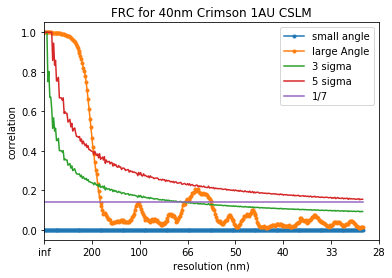

retrieved resolution for 40nm Crimson 1AU CSLM is: 170nm

applied drift correction of 0.385214 nm in x and and 7.822360 nm in y.



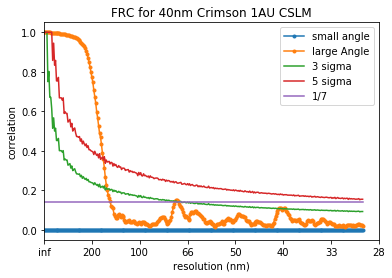

retrieved resolution for 40nm Crimson 1AU CSLM is: 143nm

applied drift correction of -0.332435 nm in x and and 6.889093 nm in y.



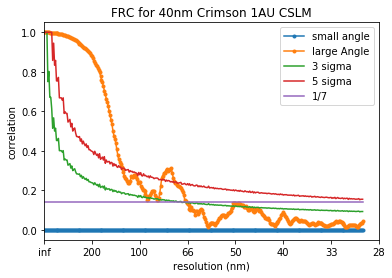

retrieved resolution for 40nm Crimson 1AU CSLM is: 67nm

applied drift correction of 1.169812 nm in x and and 6.310579 nm in y.



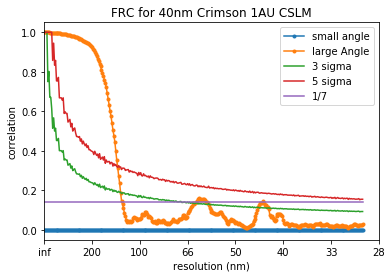

retrieved resolution for 40nm Crimson 1AU CSLM is: 122nm

applied drift correction of 0.148973 nm in x and and 7.371142 nm in y.



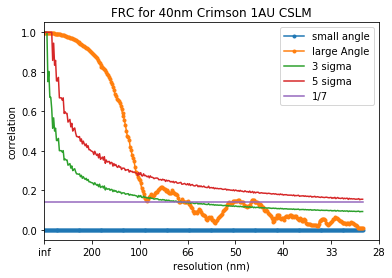

retrieved resolution for 40nm Crimson 1AU CSLM is: 71nm

applied drift correction of 2.156044 nm in x and and 8.735956 nm in y.



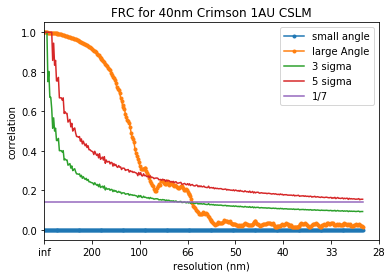

retrieved resolution for 40nm Crimson 1AU CSLM is: 65nm

applied drift correction of -0.968836 nm in x and and 6.215832 nm in y.



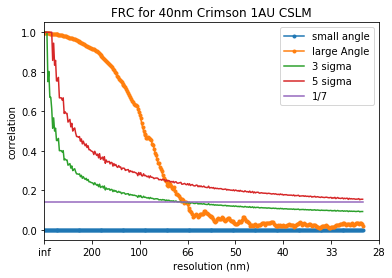

retrieved resolution for 40nm Crimson 1AU CSLM is: 69nm

applied drift correction of -0.489735 nm in x and and 8.094364 nm in y.



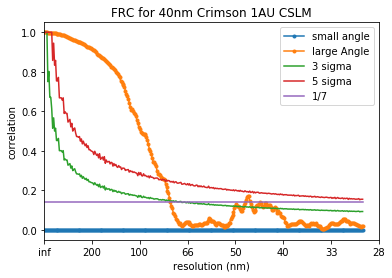

retrieved resolution for 40nm Crimson 1AU CSLM is: 76nm

applied drift correction of 0.393523 nm in x and and 6.750948 nm in y.



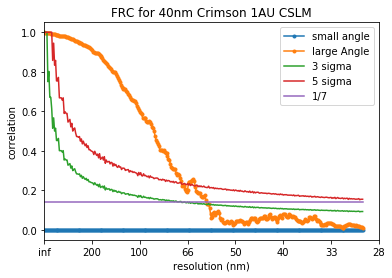

retrieved resolution for 40nm Crimson 1AU CSLM is: 59nm

applied drift correction of -2.078629 nm in x and and 8.089055 nm in y.



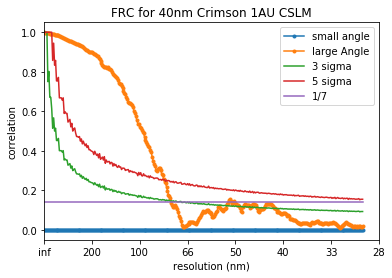

retrieved resolution for 40nm Crimson 1AU CSLM is: 75nm

applied drift correction of -0.290528 nm in x and and 8.244873 nm in y.



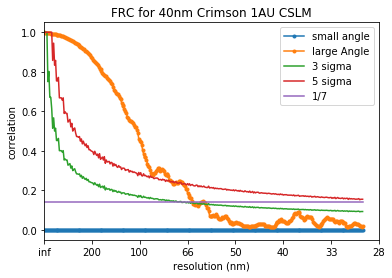

retrieved resolution for 40nm Crimson 1AU CSLM is: 64nm

applied drift correction of 0.619844 nm in x and and 7.169141 nm in y.



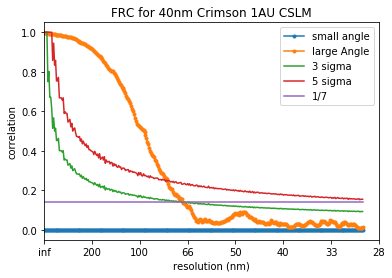

retrieved resolution for 40nm Crimson 1AU CSLM is: 69nm



In [7]:
wdir = r'N:\Singlem\singlem19-1\March\18_PowerSeries_NV'
powers = np.array([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100])
Nimg = len(powers)
lFRC = np.zeros(Nimg)
sFRC = np.zeros(Nimg)
for i, power in enumerate(powers):
    fileA = os.path.join(wdir,r'CrimsonPowerSeries\{0:d}pct_imA\Red Photons\Frames_    0-    0.txt'.format(power))
    fileB = os.path.join(wdir,r'CrimsonPowerSeries\{0:d}pct_imB\Red Photons\Frames_    0-    0.txt'.format(power))
    imA, imB = readtxt(fileA, fileB)
    smallAngles, LargeAngles, threeSigma, fiveSigma, sres, lres = FRCAnalysis(imA, imB, 15, theta = 0, correctDrift = True, title = "40nm Crimson 1AU CSLM")
    lFRC[i] = lres[0,0]
    sFRC[i] = sres[0,0]
    

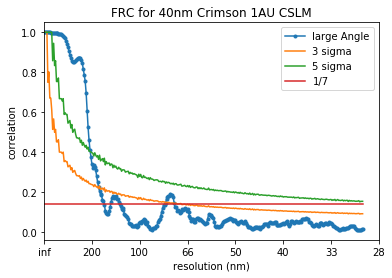

In [3]:
pltFRC(15, "40nm Crimson 1AU CSLM", threeSigma, fiveSigma, LargeAngles, [None], saveas = "GRAPH2_FRC_shows_shoulder.png")

In [9]:
def inversesqrt(x, ConfocalRes, Is):
    return ConfocalRes/(1+np.sqrt(x)/Is)

def fitSTEDpower(STEDpower, STEDresolution, p0 = (240,10)):
    return curve_fit(inversesqrt, STEDpower, STEDresolution, p0 = p0)


In [10]:
sFRC

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


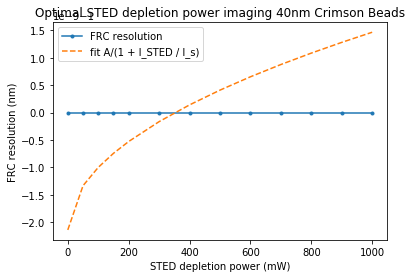

In [8]:
STEDpowers = powers*10
popt, pcov = fitSTEDpower(STEDpowers, sFRC)
fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,sFRC, '.-', label = 'FRC resolution')
plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel('STED depletion power (mW)')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 40nm Crimson Beads')
plt.legend()
plt.savefig("40nmCrimsonSTEDpowerSeriesFRC_singleFrame.png", dpi = 300)
plt.show()


In [ ]:
print (popt)

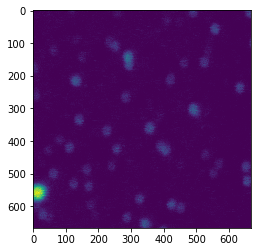

In [17]:
plt.imshow(imA)

In [13]:
def Hamming(w,h):
    alpha = 0.5
    beta = 1-alpha
    xv = alpha - beta * np.cos(2*np.pi / (w-1) * np.arange(w))
    yv = alpha - beta * np.cos(2*np.pi / (h-1) * np.arange(h))
    hamming = np.zeros([w,h])
    for i in range(h):
        hamming[i] = xv * yv[i]
    return hamming
Hm = Hamming(*imA.shape)

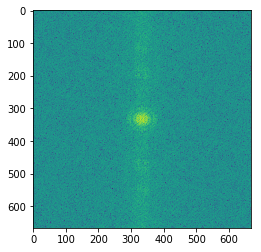

In [16]:
fftimA = np.fft.fftshift(np.fft.fft2(imA*Hm))
fftimB = np.fft.fftshift(np.fft.fft2(imB*Hm))
plt.imshow(np.log(np.abs(fftimB)))